### Исследование характеристик КИХ фильтра, синтезированного методом взвешивания.

### Вариант 5

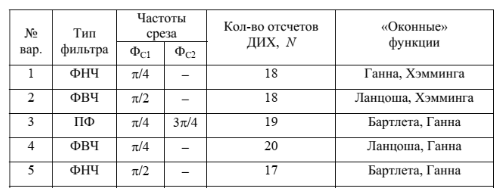
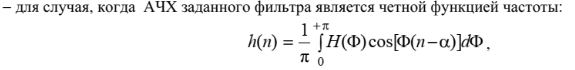

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### $Integrate.$

Данный пакет, позволяет проводить численное интегрирование: рассчитывать определенные интегралы, решать обыкновенные дифференциальные уравнения и пр.

Интеграл cos = -sin, следовательно:

Не взвешенная Дискретная импульсная характеристика
Отсчёт(0) = -3.8981718325193755e-17
Отсчёт(1) = -0.09094568176679733
Отсчёт(2) = 3.8981718325193755e-17
Отсчёт(3) = 0.12732395447351627
Отсчёт(4) = -3.8981718325193755e-17
Отсчёт(5) = -0.2122065907891938
Отсчёт(6) = 3.8981718325193755e-17
Отсчёт(7) = 0.6366197723675814
Отсчёт(8) = 1.0
Отсчёт(9) = 0.6366197723675814
Отсчёт(10) = 3.8981718325193755e-17
Отсчёт(11) = -0.2122065907891938
Отсчёт(12) = -3.8981718325193755e-17
Отсчёт(13) = 0.12732395447351627
Отсчёт(14) = 3.8981718325193755e-17
Отсчёт(15) = -0.09094568176679733
Отсчёт(16) = -3.8981718325193755e-17


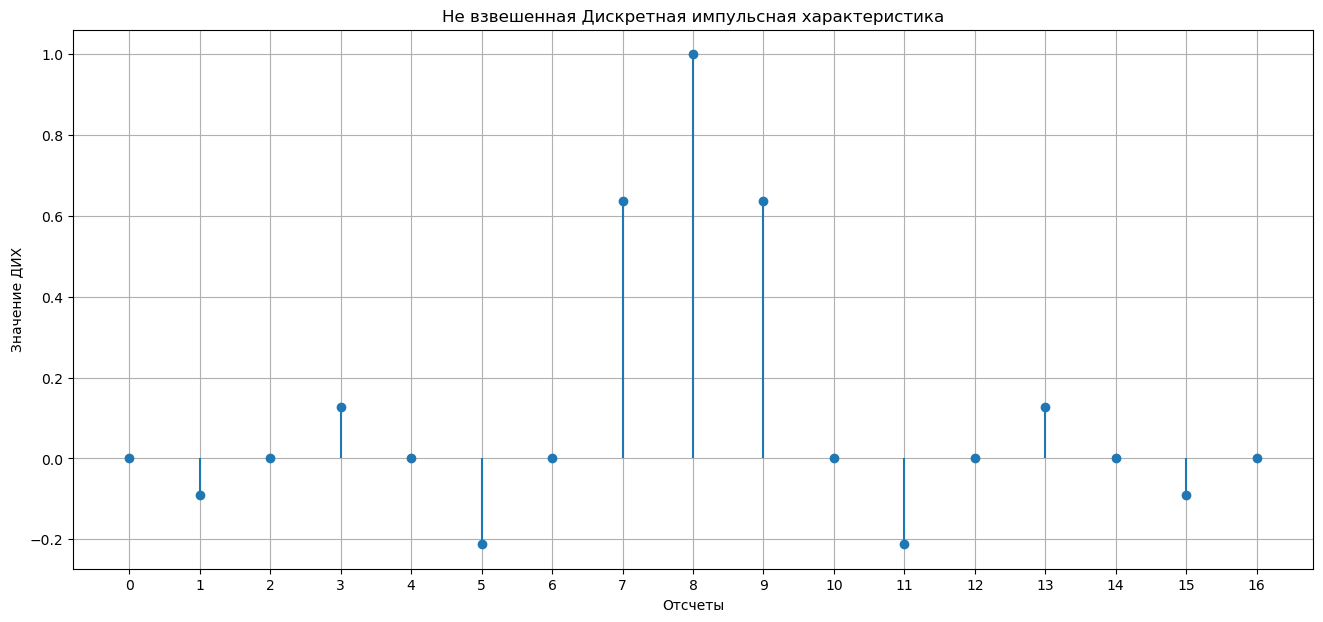

In [2]:
# N = 17
# alpha = (N-1)/2
# h_n = []
# for n in range(0, 17):
    # этот интеграл работал не правильно
#     y = -((np.sin(np.pi/2*(alpha - n)) - np.sin(0 * (alpha - n))) / alpha - n)
#     y = (1/np.pi) * y
#     h_n.append(y)


N = 17  # Количество отсчетов
fc = np.pi / 2  # Частота среза
alpha = (N-1)/2
# Вычисление коэффициентов КИХ фильтра ФНЧ
h_n = np.zeros(N)
for n in range(N):
    if n == (N - 1) / 2:
        h_n[n] = fc / np.pi
    else:
        h_n[n] = np.sin(fc * (n - alpha)) / (np.pi * (n - alpha)) # Вычисление интеграла
#! ПОЧЕМУ такой интеграл?

h_n *= 2  # Умножение на 2 для нормализации
#! ПОЧЕМУ?
h_n = np.clip(h_n, -1, 1)  # Ограничение значений

print("Не взвешенная Дискретная импульсная характеристика")
for i, n in enumerate(h_n):
    print(f"Отсчёт({i}) = {n}")

plt.figure(figsize=(16, 7))
plt.title('Не взвешенная Дискретная импульсная характеристика')
plt.stem(h_n, basefmt=" ")
plt.xticks(np.arange(0, 17, 1.0))
plt.grid(True)
plt.xlabel('Отсчеты')
plt.ylabel('Значение ДИХ')
plt.show()

Расчёт АЧХ

В строчке кода `H += h_n[n] * z**(-n)` используется принцип векторизации, который позволяет производить операции с массивами разной длины. Давайте разберем этот процесс подробнее.

1. **h_n[n]**: это просто одно значение (коэффициент фильтра) из массива h_n. Например, если n = 0, то это будет h_n[0], если n = 1, то h_n[1] и так далее, до h_n[16].

2. **z**: это массив длины 1024, содержащий значения комплексной экспоненты. Этот массив представляет собой значения функции z = e^(j*phi) для каждой точки phi из массива, который имеет 1024 элемента.

3. **z**^(-n): эта операция возводит каждый элемент массива z в степень -n, сохраняя размерность массива, т.е., результатом этой операции также будет массив из 1024 элементов.

4. **h_n[n] * z**^(-n): здесь происходит умножение одного числа (h_n[n]) на весь массив z**(-n). В NumPy это делается путем "широкого" (broadcasting) применения значения h_n[n] ко всем элементам z**(-n). В результате вы получаете массив из 1024 элементов, где каждое значение равно h_n[n] * z[k] для k от 0 до 1023.

5. **H += ...**: здесь осуществляется сложение нового массива (из 1024 элементов) к массиву H, который также имеет размерность 1024. Таким образом, происходит поэлементное сложение значений из H и нового массива.

Таким образом, используя векторизацию и широкое применение, код позволяет производить операции между массивами разной длины.

Именно поэтому код работает и не вызывает ошибок: хотя h_n имеет 17 элементов, он не взаимодействует с z как массив, а используется поэлементно для каждой итерации в цикле.

(-3.8981718325193755e-17+0j)
(-0.09094525292192275+0.00027929016288254346j)
(-0.09094525292192271+0.00027929016288254325j)
(0.03637329814014567-0.000893713771266297j)
(0.03637329814014563-0.0008937137712662966j)
(-0.17580827716986536+0.0023645485469753814j)
(-0.17580827716986533+0.0023645485469753805j)
(0.46066440695448274-0.011319636956694664j)
(1.4603626365727735-0.03588485012601646j)
(2.0967392691836992-0.05347791796905526j)
(2.0967392691836992-0.05347791796905526j)
(1.8846537441793243-0.04631082246313396j)
(1.8846537441793243-0.04631082246313396j)
(2.0118762473513017-0.05139256128269663j)
(2.0118762473513017-0.05139256128269663j)
(1.9210270386962207-0.04720468368501774j)
(1.9210270386962207-0.04720468368501774j)


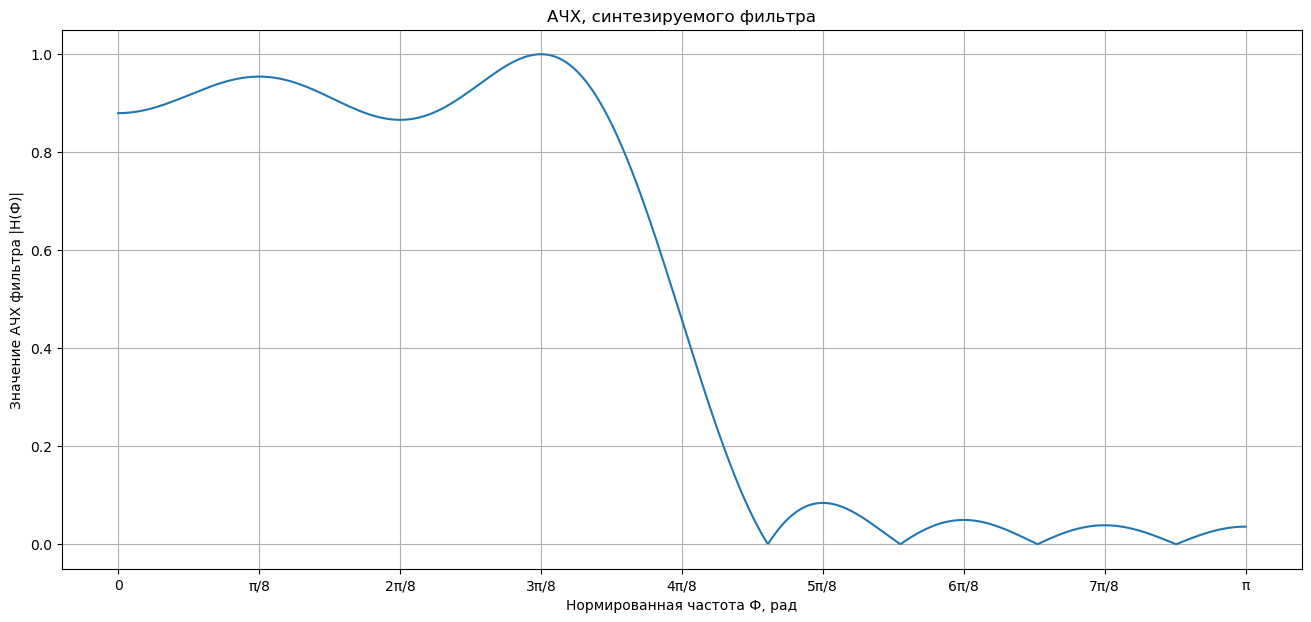

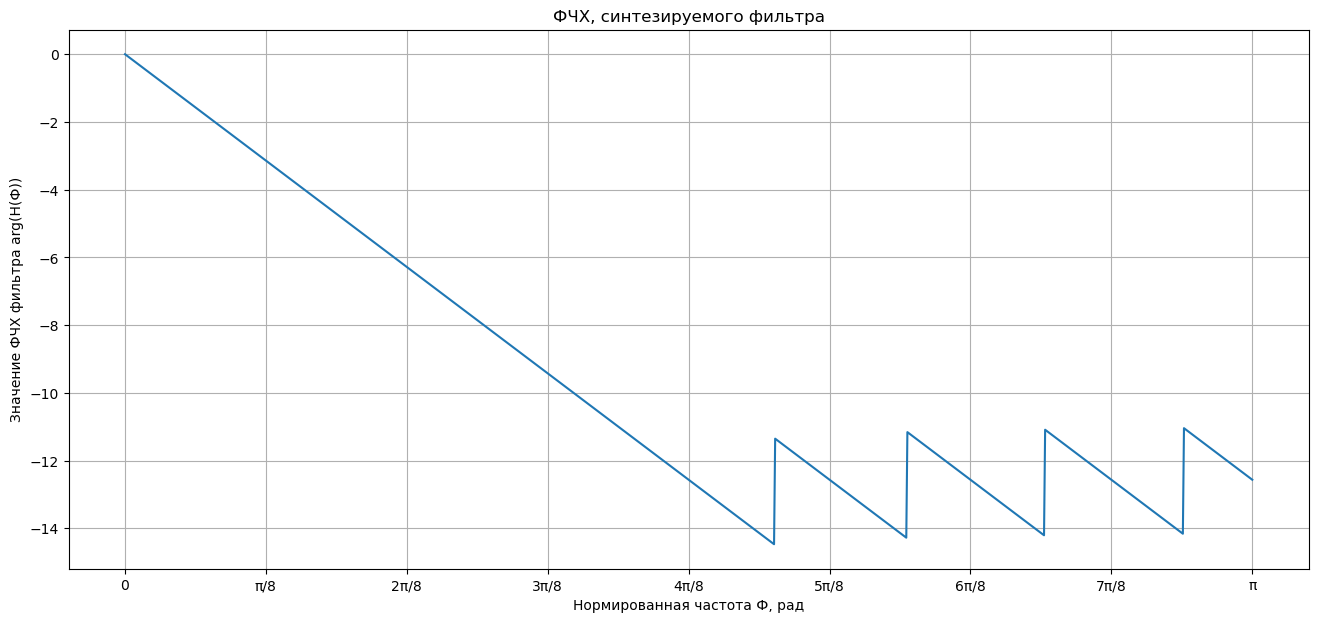

In [3]:
def z_preob():
    phi = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * phi)  # 1j - мнимая единица
    H = 0
    for n in range(0, 17):
        H += h_n[n] * z**(-n)
        print(H[1])

    return H    

H_phi = z_preob()



phi = np.linspace(0, np.pi, 1024)

plt.figure(figsize=(16, 7))
plt.title('AЧХ, синтезируемого фильтра')
plt.plot(phi, np.abs(H_phi)/np.max(np.abs(H_phi)))
plt.grid(True)
plt.xticks([ 0,
            np.pi/8, 2*np.pi/8, 3*np.pi/8, 4*np.pi/8,
            5*np.pi/8, 6*np.pi/8, 7*np.pi/8, np.pi],
           ['0',
            'π/8','2π/8','3π/8','4π/8',
            '5π/8','6π/8','7π/8','π'])
#plt.axvline(np.pi/2, color = "green")
# plt.axhline(0.707, color = "green")
plt.xlabel('Нормированная частота Ф, рад')
plt.ylabel('Значение АЧХ фильтра |H(Ф)|')
plt.show()

plt.figure(figsize=(16, 7))
plt.title('ФЧХ, синтезируемого фильтра')

h_phase = np.unwrap(np.angle(H_phi))

plt.plot(phi, h_phase)
plt.grid(True)
plt.xticks([0,
            np.pi/8, 2*np.pi/8, 3*np.pi/8, 4*np.pi/8,
            5*np.pi/8, 6*np.pi/8, 7*np.pi/8, np.pi],
           ['0',
            'π/8','2π/8','3π/8','4π/8',
            '5π/8','6π/8','7π/8','π'])
plt.xlabel('Нормированная частота Ф, рад')
plt.ylabel('Значение ФЧХ фильтра arg(H(Ф))')
plt.show()



### Оконные функции

Бартлетт, Ганн

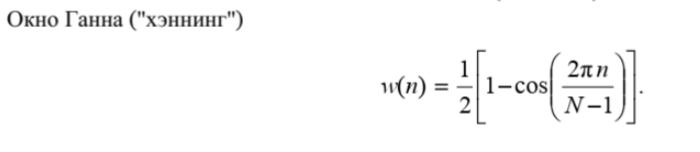

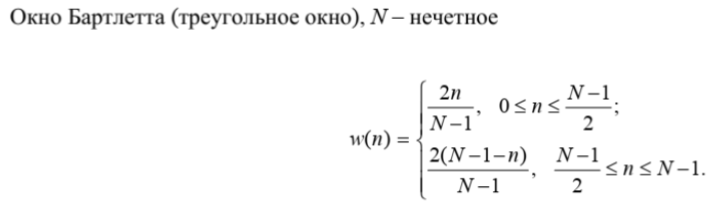

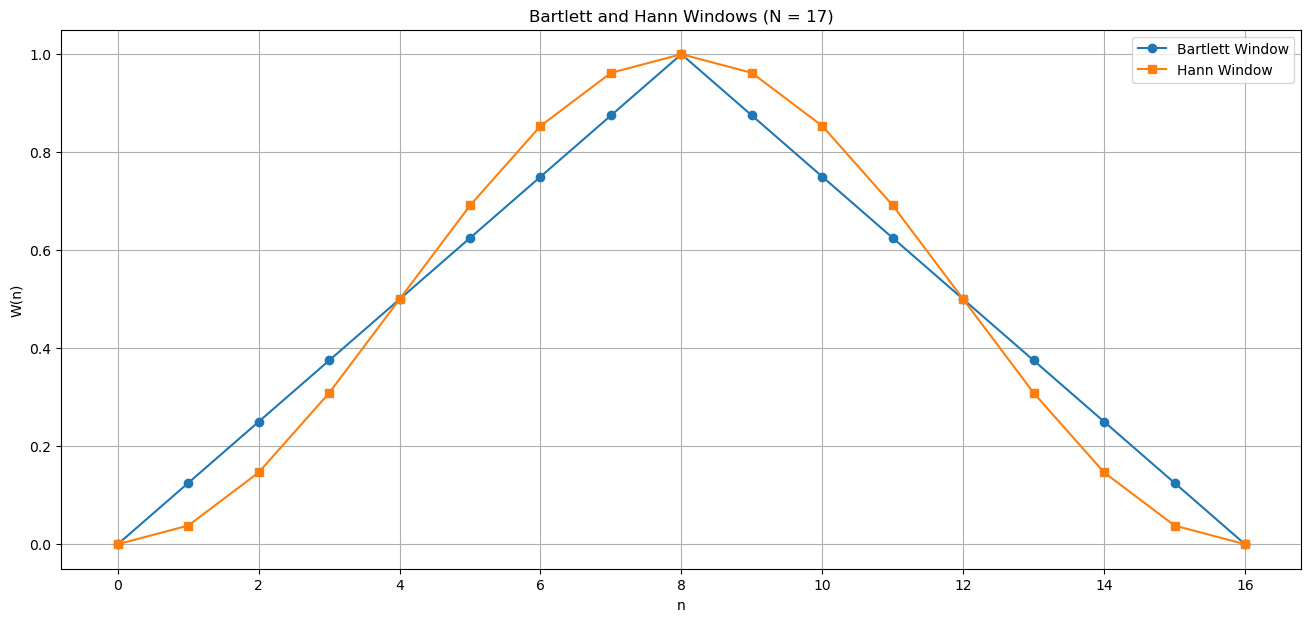

In [4]:
# Параметр окна
N = 17

# Окно Бартлетта
def bartlett_window(N):
    W = np.zeros(N)
    for n in range(N):
        if 0 <= n <= (N - 1) / 2:
            W[n] = 2 * n / (N - 1)
        elif (N - 1) / 2 < n <= N - 1:
            W[n] = 2 * (N - 1 - n) / (N - 1)
    return W

# Окно Ганна
def hann_window(N):
    W = np.zeros(N)
    for n in range(N):
        W[n] = 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))
    return W

# Вычисление окон
bartlett = bartlett_window(N)
hann = hann_window(N)

# Визуализация
plt.figure(figsize=(16, 7))
plt.plot(bartlett, label="Bartlett Window", marker="o")
plt.plot(hann, label="Hann Window", marker="s")
plt.title(f"Bartlett and Hann Windows (N = {N})")
plt.xlabel("n")
plt.ylabel("W(n)")
plt.grid()
plt.legend()
plt.show()

ДИХ с Бартлетта и ДИХ с Ганна

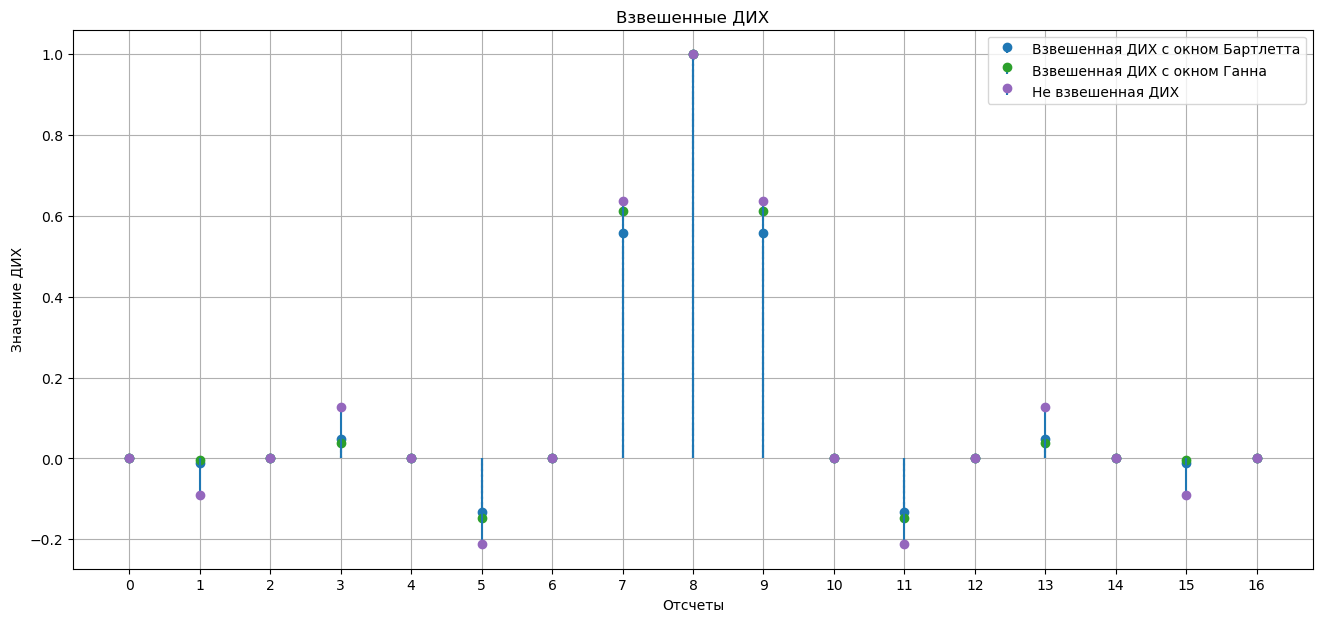

Взвешенная импульсная характеристика c окном Бартлетта
Отсчёт(0) = -0.0
Отсчёт(1) = -0.011368210220849667
Отсчёт(2) = 9.745429581298439e-18
Отсчёт(3) = 0.0477464829275686
Отсчёт(4) = -1.9490859162596877e-17
Отсчёт(5) = -0.1326291192432461
Отсчёт(6) = 2.923628874389532e-17
Отсчёт(7) = 0.5570423008216338
Отсчёт(8) = 1.0
Отсчёт(9) = 0.5570423008216338
Отсчёт(10) = 2.923628874389532e-17
Отсчёт(11) = -0.1326291192432461
Отсчёт(12) = -1.9490859162596877e-17
Отсчёт(13) = 0.0477464829275686
Отсчёт(14) = 9.745429581298439e-18
Отсчёт(15) = -0.011368210220849667
Отсчёт(16) = -0.0
Взвешенная импульсная характеристика c окном Ганна
Отсчёт(0) = -0.0
Отсчёт(1) = -0.0034614139060841795
Отсчёт(2) = 5.708740477572671e-18
Отсчёт(3) = 0.03929959327664732
Отсчёт(4) = -1.9490859162596874e-17
Отсчёт(5) = -0.14670726866144823
Отсчёт(6) = 3.327297784762108e-17
Отсчёт(7) = 0.6123898750249921
Отсчёт(8) = 1.0
Отсчёт(9) = 0.6123898750249922
Отсчёт(10) = 3.327297784762109e-17
Отсчёт(11) = -0.14670726866144831
Отсчё

In [5]:
H_B = h_n * bartlett
H_H = h_n * hann

plt.figure(figsize=(16, 7))
plt.title('Взвешенные ДИХ')
plt.stem(H_B, linefmt = '-.',basefmt=" ", label="Взвешенная ДИХ c окном Бартлетта")
plt.stem(H_H, linefmt = ':', basefmt=" ", label="Взвешенная ДИХ c окном Ганна")
plt.stem(h_n, linefmt = '-', basefmt=" ", label="Не взвешенная ДИХ")
plt.xticks(np.arange(0, 17, 1.0))
plt.grid(True)
plt.xlabel('Отсчеты')
plt.ylabel('Значение ДИХ')
plt.legend()
plt.show()

print("Взвешенная импульсная характеристика c окном Бартлетта")
for i, n in enumerate(H_B):
    print(f"Отсчёт({i}) = {n}")

print("Взвешенная импульсная характеристика c окном Ганна")
for i, n in enumerate(H_H):
    print(f"Отсчёт({i}) = {n}")

### Взвешенные АЧХ

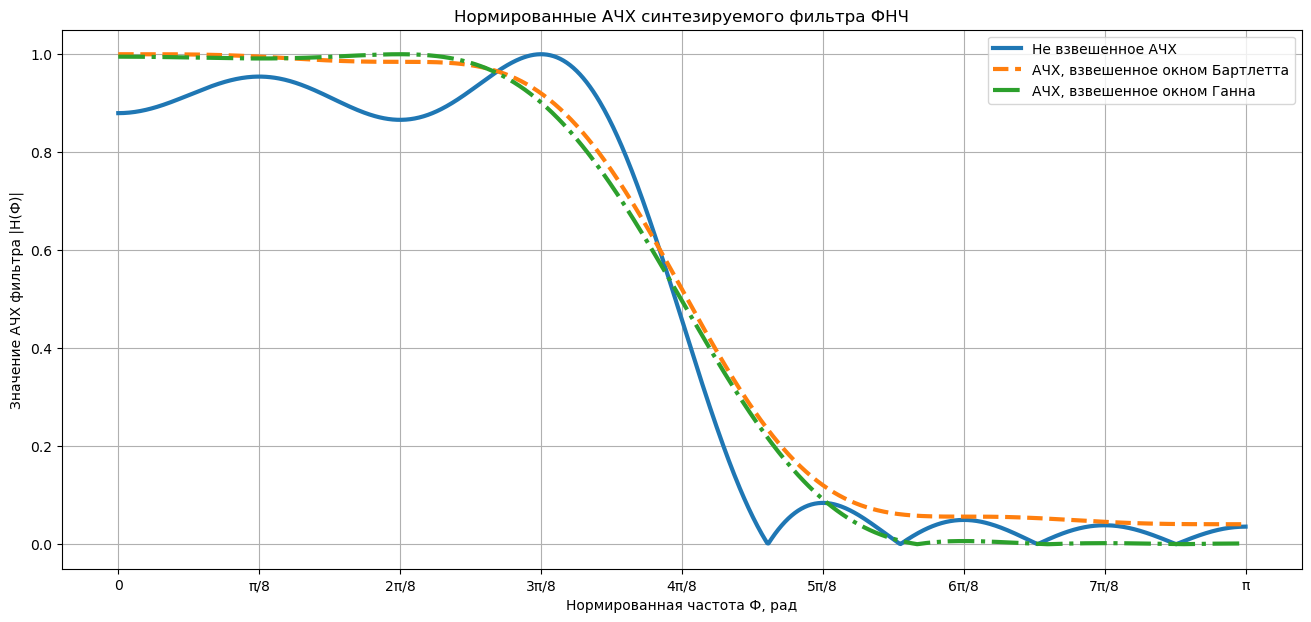

In [6]:
def z_preob1():
    phi = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * phi)  # 1j - мнимая единица
    H = 0
    for n in range(0, 17):
        H += H_B[n] * z**(-n)

    return H

def z_preob2():
    phi = np.linspace(0, np.pi, 1024)
    z = np.exp(1j * phi)  # 1j - мнимая единица
    H = 0
    for n in range(0, 17):
        H += H_H[n] * z**(-n)

    return H        

#H_phi = z_preob()
H_B_phi = z_preob1()
H_H_phi = z_preob2()

phi = np.linspace(0, np.pi, 1024)

plt.figure(figsize=(16, 7))
plt.title('Нормированные АЧХ синтезируемого фильтра ФНЧ')
plt.plot(phi,np.abs(H_phi)/np.max(np.abs(H_phi)), '-', linewidth=3, label='Не взвешенное АЧХ')
plt.plot(phi,np.abs(H_B_phi)/np.max(np.abs(H_B_phi)), '--', linewidth=3, label='АЧХ, взвешенное окном Бартлетта')
plt.plot(phi,np.abs(H_H_phi)/np.max(np.abs(H_H_phi)), '-.', linewidth=3, label='АЧХ, взвешенное окном Ганна')
plt.xticks(np.arange(0, np.pi, np.pi/6))
plt.grid(True)
plt.xticks([0,
            np.pi/8, 2*np.pi/8, 3*np.pi/8, 4*np.pi/8,
            5*np.pi/8, 6*np.pi/8, 7*np.pi/8, np.pi],
           ['0',
            'π/8','2π/8','3π/8','4π/8',
            '5π/8','6π/8','7π/8','π'])
plt.xlabel('Нормированная частота Ф, рад')
plt.ylabel('Значение АЧХ фильтра |H(Ф)|')
plt.legend()
plt.show()

#### Как сделать всё тоже самое, что было проделано выше, но с помощью готовых оконных функций и библиотеки _scipy_ показано ниже.

Не взвешенная Дискретная импульсная характеристика
Отсчёт(0) = -3.8981718325193755e-17
Отсчёт(1) = -0.09094568176679733
Отсчёт(2) = 3.8981718325193755e-17
Отсчёт(3) = 0.12732395447351627
Отсчёт(4) = -3.8981718325193755e-17
Отсчёт(5) = -0.2122065907891938
Отсчёт(6) = 3.8981718325193755e-17
Отсчёт(7) = 0.6366197723675814
Отсчёт(8) = 1.0
Отсчёт(9) = 0.6366197723675814
Отсчёт(10) = 3.8981718325193755e-17
Отсчёт(11) = -0.2122065907891938
Отсчёт(12) = -3.8981718325193755e-17
Отсчёт(13) = 0.12732395447351627
Отсчёт(14) = 3.8981718325193755e-17
Отсчёт(15) = -0.09094568176679733
Отсчёт(16) = -3.8981718325193755e-17


C:\Users\User\AppData\Local\Temp\ipykernel_7276\1788823477.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, basefmt=" ", use_line_collection=True)


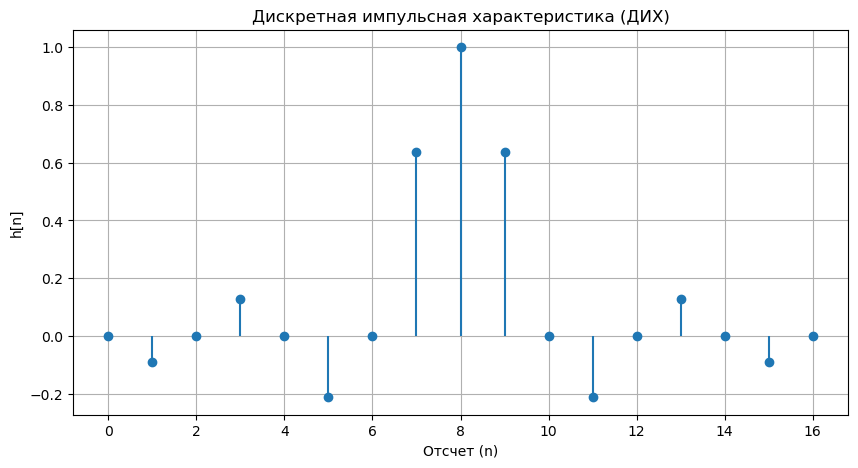

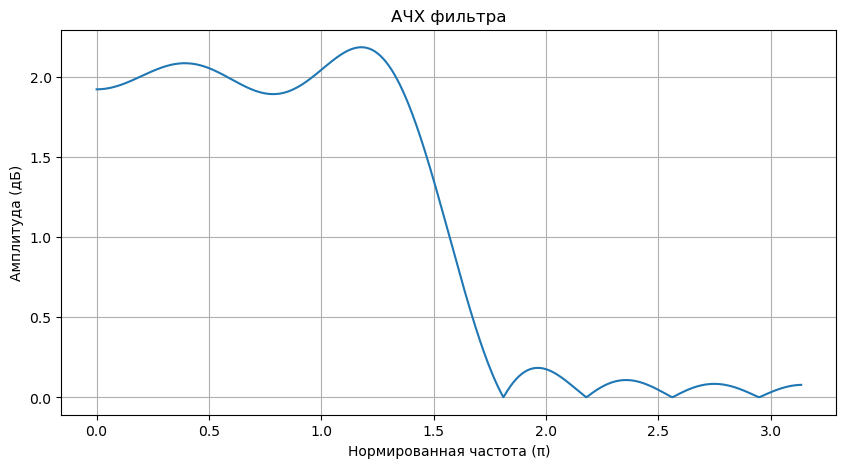

Бартлетт
Отсчёт(0) = -0.0
Отсчёт(1) = -0.011368210220849667
Отсчёт(2) = 9.745429581298439e-18
Отсчёт(3) = 0.0477464829275686
Отсчёт(4) = -1.9490859162596877e-17
Отсчёт(5) = -0.1326291192432461
Отсчёт(6) = 2.923628874389532e-17
Отсчёт(7) = 0.5570423008216338
Отсчёт(8) = 1.0
Отсчёт(9) = 0.5570423008216338
Отсчёт(10) = 2.923628874389532e-17
Отсчёт(11) = -0.1326291192432461
Отсчёт(12) = -1.9490859162596877e-17
Отсчёт(13) = 0.0477464829275686
Отсчёт(14) = 9.745429581298439e-18
Отсчёт(15) = -0.011368210220849667
Отсчёт(16) = -0.0


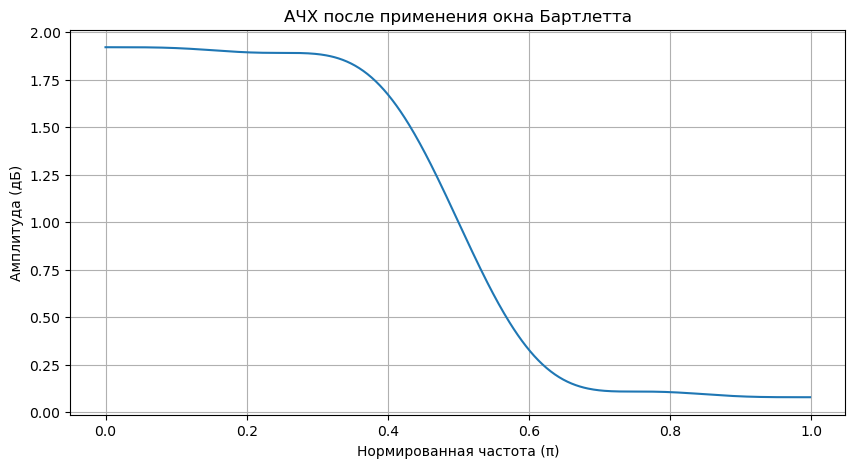

Ганн
Отсчёт(0) = -0.0
Отсчёт(1) = -0.0034614139060841795
Отсчёт(2) = 5.7087404775726735e-18
Отсчёт(3) = 0.039299593276647324
Отсчёт(4) = -1.9490859162596877e-17
Отсчёт(5) = -0.14670726866144826
Отсчёт(6) = 3.327297784762108e-17
Отсчёт(7) = 0.6123898750249921
Отсчёт(8) = 1.0
Отсчёт(9) = 0.6123898750249921
Отсчёт(10) = 3.327297784762108e-17
Отсчёт(11) = -0.14670726866144826
Отсчёт(12) = -1.9490859162596877e-17
Отсчёт(13) = 0.039299593276647324
Отсчёт(14) = 5.7087404775726735e-18
Отсчёт(15) = -0.0034614139060841795
Отсчёт(16) = -0.0


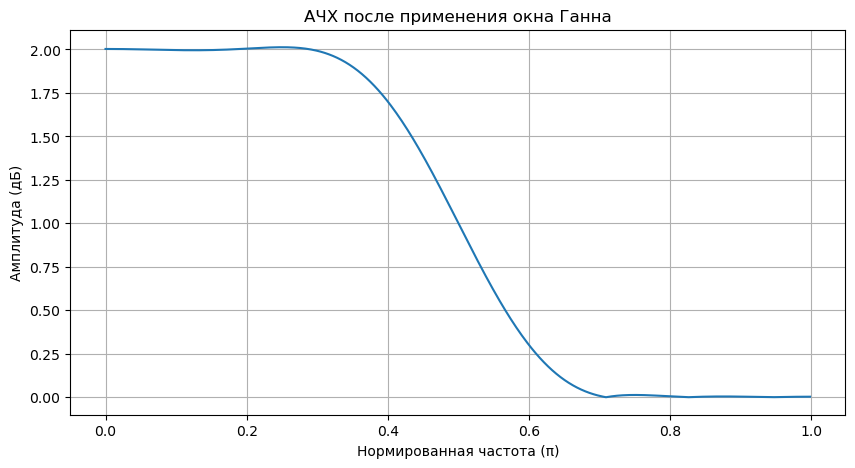

In [7]:
from scipy.signal import freqz
# Параметры фильтра
N = 17  # Количество отсчетов
fc = np.pi / 2  # Частота среза

# Вычисление коэффициентов КИХ фильтра ФНЧ
h_n = np.zeros(N)
for n in range(N):
    if n == (N - 1) / 2:
        h_n[n] = fc / np.pi
    else:
        h_n[n] = np.sin(fc * (n - (N - 1) / 2)) / (np.pi * (n - (N - 1) / 2))
        #! Почему тут взялтся такой интеграл?

# Нормализация коэффициентов
h_n *= 2  # Умножение на 2 для нормализации
#! ПОЧЕМУ?
h_n = np.clip(h_n, -1, 1)  # Ограничение значений

print("Не взвешенная Дискретная импульсная характеристика")
for i, n in enumerate(h_n):
    print(f"Отсчёт({i}) = {n}")


# Построение ДИХ
plt.figure(figsize=(10, 5))
plt.stem(h_n, basefmt=" ", use_line_collection=True)
plt.title('Дискретная импульсная характеристика (ДИХ)')
plt.xlabel('Отсчет (n)')
plt.ylabel('h[n]')
plt.grid()
plt.show()



# Вычисление и построение АЧХ
w, H = freqz(h_n)
plt.figure(figsize=(10, 5))
plt.plot(w, abs(H))
plt.title('АЧХ фильтра')
plt.xlabel('Нормированная частота (π)')
plt.ylabel('Амплитуда (дБ)')
plt.grid()
plt.show()

# Применение окна Бартлетта
window_bartlett = np.bartlett(N)
h_n_bartlett = h_n * window_bartlett

print("Бартлетт")
for i, n in enumerate(h_n_bartlett):
    print(f"Отсчёт({i}) = {n}")

# АЧХ после применения окна Бартлетта
w_bartlett, H_bartlett = freqz(h_n_bartlett)
plt.figure(figsize=(10, 5))
plt.plot(w_bartlett/np.pi, abs(H_bartlett))
plt.title('АЧХ после применения окна Бартлетта')
plt.xlabel('Нормированная частота (π)')
plt.ylabel('Амплитуда (дБ)')
plt.grid()
plt.show()

# Применение окна Ганна
window_hanning = np.hanning(N)
h_n_hanning = h_n * window_hanning

print("Ганн")
for i, n in enumerate(h_n_hanning):
    print(f"Отсчёт({i}) = {n}")

# АЧХ после применения окна Ганна
w_hanning, H_hanning = freqz(h_n_hanning)
plt.figure(figsize=(10, 5))
plt.plot(w_hanning/np.pi, abs(H_hanning))
plt.title('АЧХ после применения окна Ганна')
plt.xlabel('Нормированная частота (π)')
plt.ylabel('Амплитуда (дБ)')
plt.grid()
plt.show()
